In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from deap import tools, algorithms

from preprocessing import preprocess_data
from ga_setup import setup_toolbox, setup_stats
from strategy_visualizer import print_strategy, plot_strategy

In [2]:
df = pd.read_csv("./data/wig_d.csv", sep=";")
stock_data, ta_features = preprocess_data(df)
pd.concat([stock_data, ta_features],axis=1)

,date,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
100,2011-09-08,40442.90,40732.76,40001.76,40405.17,117787166,0.010527,0.031441,0.851364,0.624558,...,0.577687,0.507310,0.674967,0.379144,0.512771,0.260686,0.096299,0.684075,0.704275,0.124458
101,2011-09-09,40190.27,40253.71,38708.57,38708.57,88364971,0.002279,0.019927,0.751935,0.530293,...,0.565250,0.515271,0.629350,0.351974,0.496543,0.232126,0.095295,0.458212,0.482086,0.069694
102,2011-09-12,37969.75,37969.75,37051.55,37437.36,152938899,0.000000,0.000000,0.679218,0.419615,...,0.537982,0.515282,0.564764,0.403653,0.497833,0.326124,0.087761,0.507809,0.531693,0.028660
103,2011-09-13,37963.50,38081.49,37120.14,37735.42,120273982,0.003144,0.015671,0.632797,0.479370,...,0.523094,0.511819,0.536547,0.408170,0.500112,0.331433,0.080410,0.728995,0.747359,0.038281
104,2011-09-14,37438.64,38144.62,37438.64,37881.76,116739076,0.005926,0.030882,0.613277,0.517987,...,0.515916,0.507375,0.528576,0.408150,0.501930,0.328958,0.070523,0.706859,0.726172,0.043005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,2020-06-05,50444.76,51573.79,50444.76,51494.63,102913799,0.983454,0.953462,0.783798,0.886169,...,0.966601,0.937050,0.723119,0.650704,0.754736,0.439126,0.434404,0.825358,0.838599,0.482414
2279,2020-06-08,51488.28,51704.68,50806.53,51451.61,88171198,0.987046,0.941974,0.820142,0.852654,...,0.984643,0.956861,0.725604,0.633581,0.767887,0.389767,0.453539,0.681307,0.701609,0.481026
2280,2020-06-09,51600.46,51797.65,50738.75,51289.49,95756903,0.987406,0.929497,0.779111,0.816049,...,0.993649,0.974810,0.710479,0.628860,0.777104,0.368658,0.460786,0.668755,0.689500,0.475793
2281,2020-06-10,51393.51,51574.08,50896.16,51486.94,128616735,0.996324,0.946255,0.837785,0.812151,...,1.000000,0.990651,0.693349,0.667997,0.795286,0.416764,0.468005,0.706705,0.726024,0.482166


In [3]:
# for col in ta_features.columns:
#     plt.plot(ta_features[col])
#     plt.title(col)
#     plt.show()

In [4]:
toolbox = setup_toolbox(stock_data, ta_features)
stats = setup_stats()
hof = tools.HallOfFame(1)
population = toolbox.population(n=50)

In [5]:
final_population = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, halloffame=hof, stats=stats, verbose=True)

gen	nevals	avg            	std          	min           	max            
0  	50    	[1094.39668559]	[164.9757643]	[668.34143117]	[1385.58724105]
1  	31    	[1214.3787723] 	[213.15835534]	[694.67702511]	[1680.40394774]
2  	29    	[1317.33805958]	[192.92540866]	[506.66479674]	[1793.65979372]
3  	26    	[1458.80384142]	[188.13144328]	[1105.28332959]	[1945.7839939] 
4  	24    	[1548.43519375]	[205.73405822]	[1000.]        	[2009.53110428]
5  	33    	[1536.33643063]	[280.60915832]	[1028.62611232]	[2212.24963882]
6  	35    	[1600.8953768] 	[328.00020668]	[995.29023312] 	[2212.24963882]
7  	28    	[1643.44452667]	[323.33541384]	[1009.0467931] 	[2212.24963882]
8  	33    	[1688.84699992]	[298.11784078]	[1066.47612707]	[2212.24963882]
9  	24    	[1902.45213347]	[222.27704977]	[1291.42604472]	[2212.24963882]
10 	31    	[1853.09602635]	[298.17802879]	[1281.76709232]	[2212.24963882]
11 	33    	[2009.34800029]	[226.99245813]	[1297.01625094]	[2247.16583495]
12 	31    	[2088.98434332]	[203.85224757]	[1

In [7]:
best_strategy = hof[0]
pd.DataFrame(zip(ta_features.columns, best_strategy), columns=["feature", "weight"])

,feature,weight
0,volume_adi,0.524426
1,volume_obv,-0.597437
2,volume_cmf,0.047767
3,volume_fi,0.522395
4,volume_em,0.562177
...,...,...
79,momentum_pvo_hist,-0.171622
80,momentum_kama,-0.896732
81,others_dr,0.117086
82,others_dlr,0.745755


In [8]:
print_strategy(stock_data, ta_features, best_strategy)

  DATE:  2011-09-08    ACTION:          buy     CLOSE:    40405.17     MONEY:           0    SHARES:  0.024749308
  DATE:  2012-11-19    ACTION:         sell     CLOSE:    44369.05     MONEY: 1098.103287    SHARES:            0
  DATE:  2012-11-21    ACTION:          buy     CLOSE:    44218.33     MONEY:           0    SHARES:  0.024833667
  DATE:  2013-03-08    ACTION:         sell     CLOSE:    47074.39     MONEY: 1169.029730    SHARES:            0
  DATE:  2013-03-11    ACTION:          buy     CLOSE:    46933.03     MONEY:           0    SHARES:  0.024908464
  DATE:  2013-10-11    ACTION:         sell     CLOSE:    52230.47     MONEY: 1300.980828    SHARES:            0
  DATE:  2013-10-17    ACTION:          buy     CLOSE:    52573.59     MONEY:           0    SHARES:  0.024745900
  DATE:  2013-10-21    ACTION:         sell     CLOSE:    53853.55     MONEY: 1332.654591    SHARES:            0
  DATE:  2013-10-22    ACTION:          buy     CLOSE:    53781.81     MONEY:           

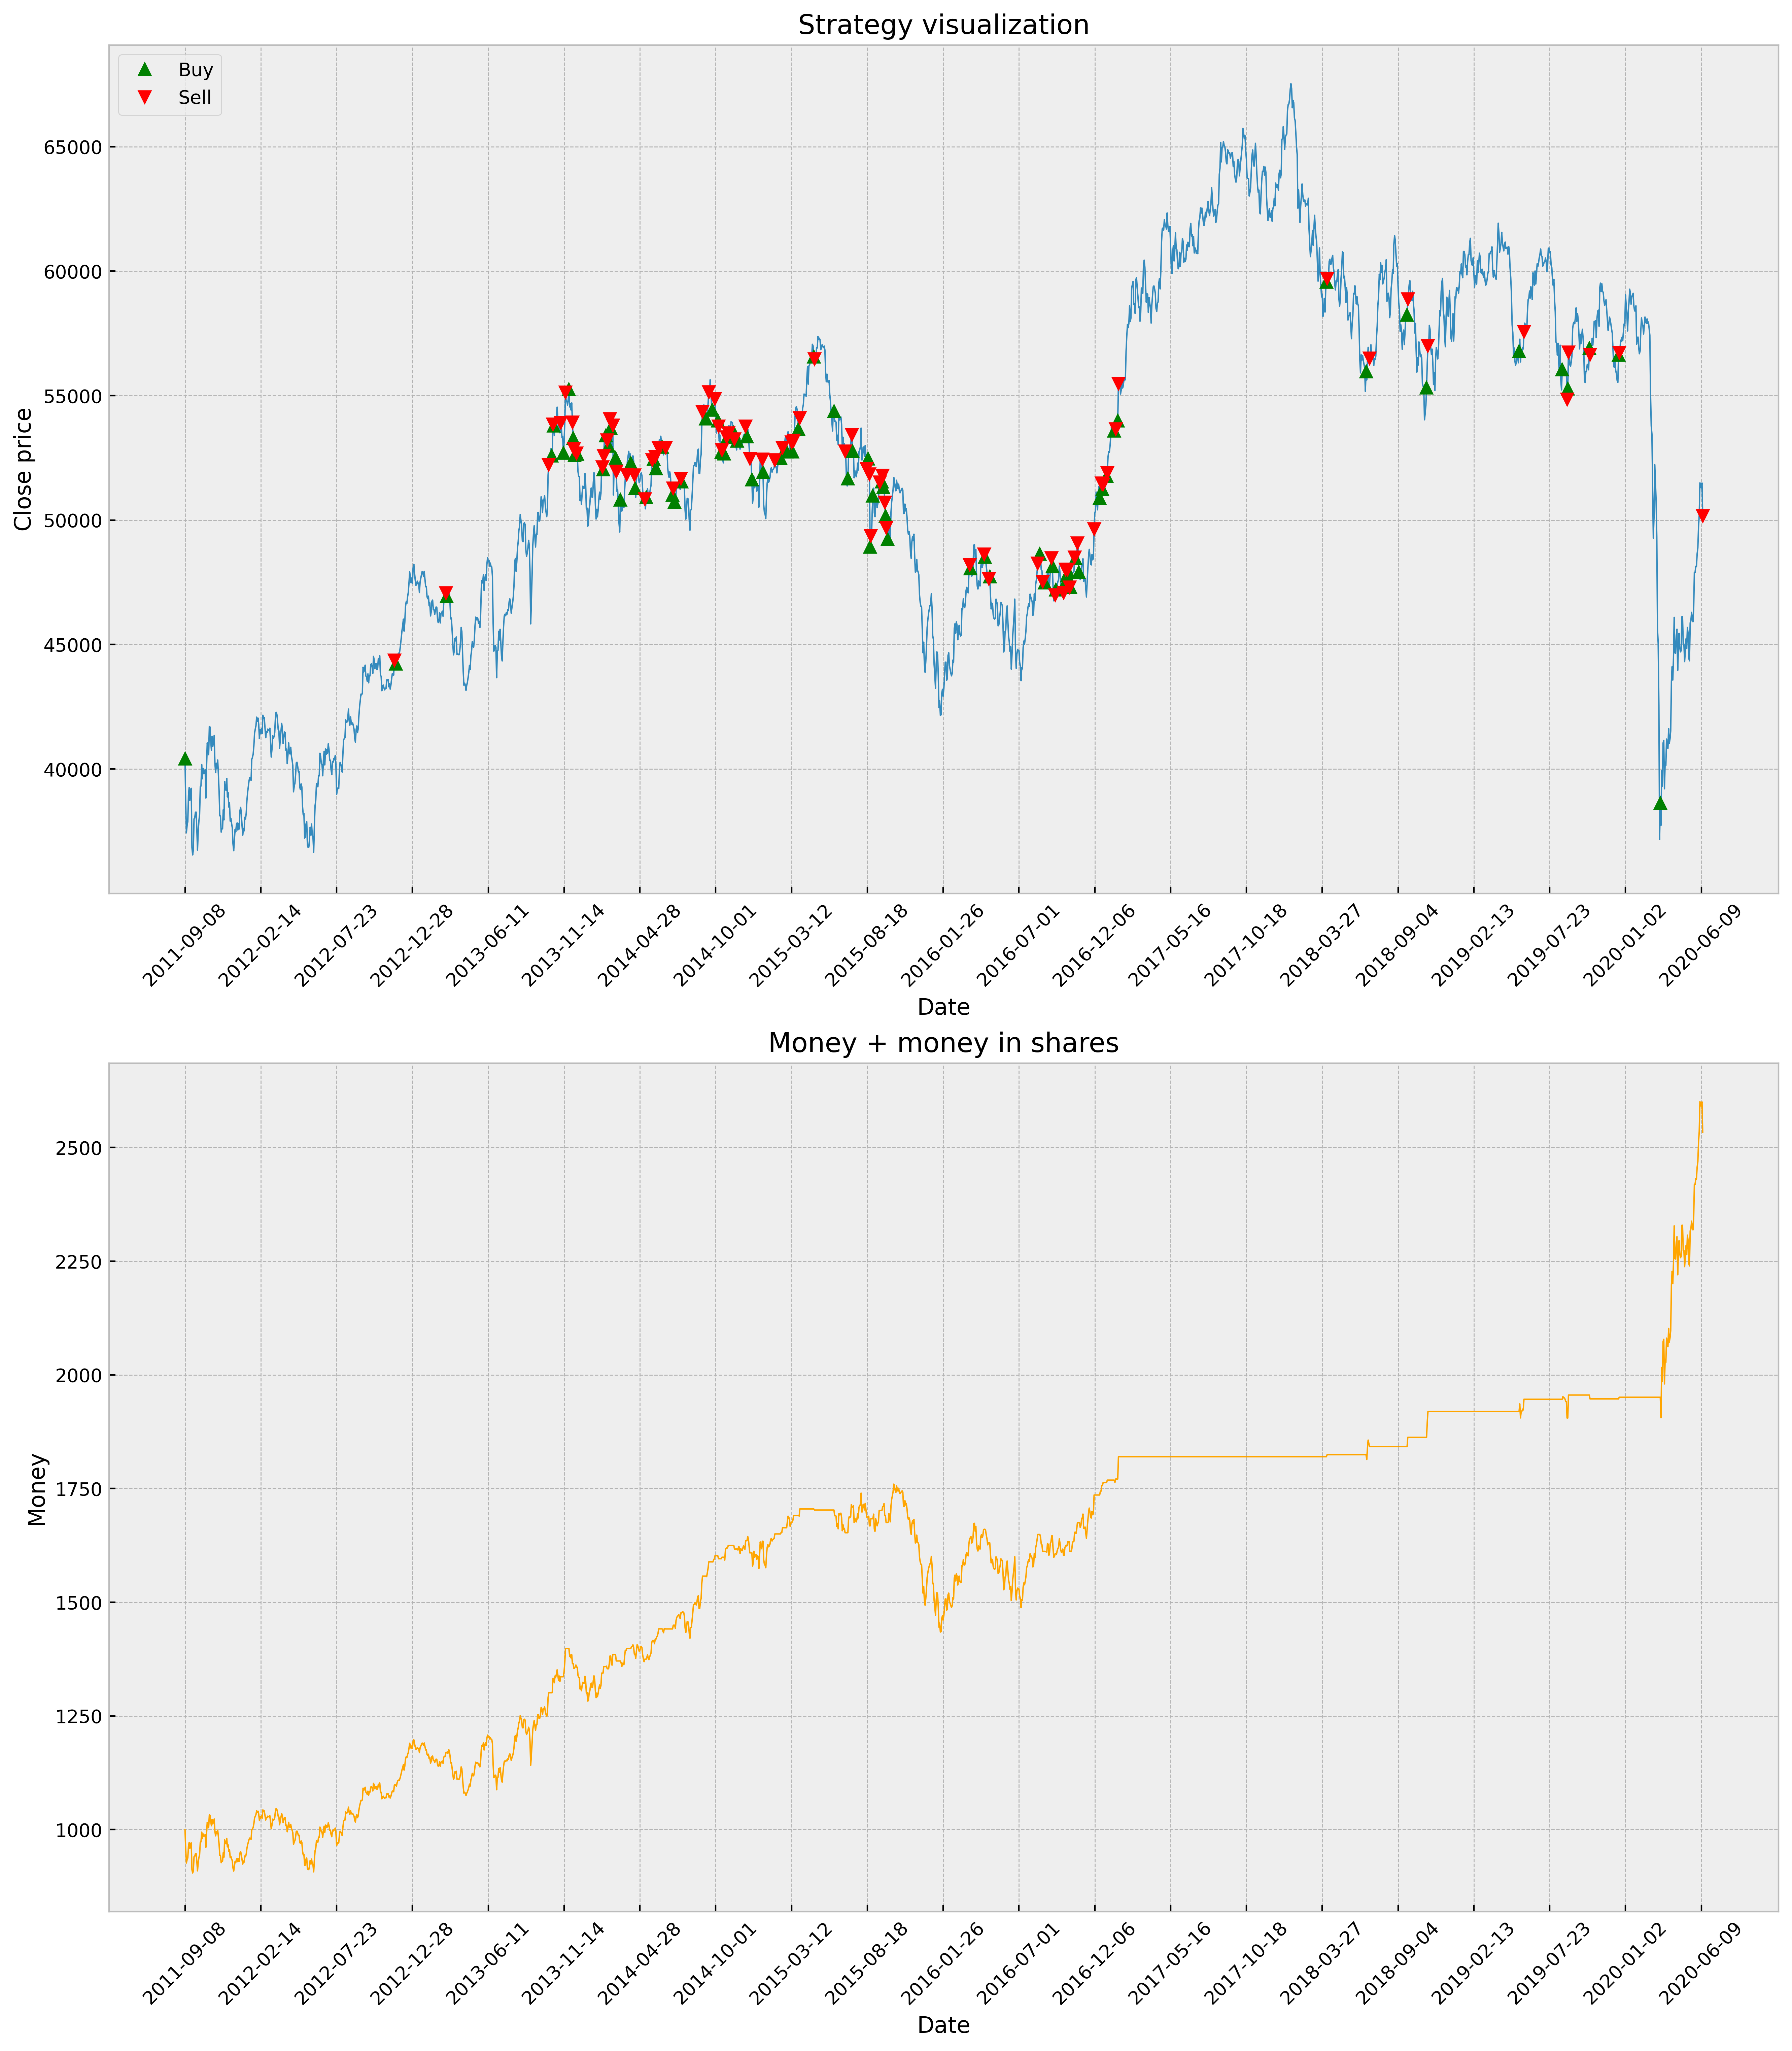

In [9]:
plot_strategy(stock_data, ta_features, best_strategy)